In [1]:
# Written in Python 3.9.6
# Packages
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
import glob, re
from scipy.signal import find_peaks
import csv
import spectrum
sns.set()
# Update plotting parameters
params = {'legend.fontsize': 'x-large',         
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
          'font.sans-serif': "Arial",
          'font.family': "sans-serif",
          'figure.figsize': (6, 6),
         }
sns.set()
plt.rcParams.update(params)
# tableau = np.flipud(np.array(['#FF0D0D', '#FF4E11', '#FF8E15', '#FAB733', '#ACB334', '#0AA04F', 'green', 'blue', 'black']))

# Experimental data analysis
- Olympus objective 10X, NA 0.27 
- New emitter, pretty high current, measured in parallel with .mat files
- Five samples aligned in a row 
- Current-dependent measurement
- Voltage-dependent measurement
- With power calibration from round 4 

/round4-august24/power_calib/reference/ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/power_calib/reference/AVA_ref_spectrum_withfilter 2020 August 25 13_54_14
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/power_calib/reference/AVA_ref_spectrum_withfilter 2020 August 25 13_54_14, 10 integrated files
/round4-august24/power_calib/reference/background/ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/power_calib/reference/background/AVA_ref_spectrum_withfilter_background 2020 August 26 07_31_38
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/

Text(0, 0.5, 'Loss function ((counts/s)/(W/nm))')

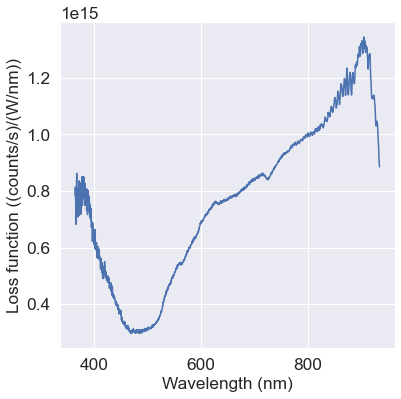

In [2]:
## I -- POWER CALIBRATION (FROM ROUND 4)

total_power = (1.033 - 0.013)*1e-6

# Load spectrum measured right after the source (and through filters)
path = '/round4-august24/power_calib/reference/'
spectra = spectrum.find_all_spectra(path, caption_flag = path, caption_length= len(path))
spectra = spectrum.find_all_current_files_match(path, spectra, caption_flag="reference")

path_to_background = path + 'background/'

background_spectrum_multi = spectrum.find_all_spectra(path_to_background, caption_flag=path_to_background, caption_length=len(path_to_background))
print(path_to_background)
background_spectrum_multi = background_spectrum_multi[0]
background_spectrum_multi.process_spectra_list()

for spec in spectra:
    spec.process_spectra_list()

reference_spectrum = spectra[0]
reference_spectrum.remove_background(background_spectrum_multi)

# Normalize reference_spectrum to power spectral density
integrated_spectrum = np.trapz(reference_spectrum.lint, x = reference_spectrum.wl)
reference_spectrum.lint = reference_spectrum.lint/integrated_spectrum*total_power

print("Sanity check: total power = {} uW".format(np.trapz(reference_spectrum.lint, x = reference_spectrum.wl)*1e6))

# Load spectrum of source going through setup 
path = '/round4-august24/power_calib/through_setup/'
spectra = spectrum.find_all_spectra(path, caption_flag = path, caption_length= len(path))
spectra = spectrum.find_all_current_files_match(path, spectra, caption_flag="through_setup")

path_to_background = path + 'background/'

background_spectrum_multi = spectrum.find_all_spectra(path_to_background, caption_flag=path_to_background, caption_length=len(path_to_background))
background_spectrum_multi = background_spectrum_multi[0]
background_spectrum_multi.process_spectra_list()

for spec in spectra:
    spec.process_spectra_list()

through_setup_spectrum = spectra[0]
through_setup_spectrum.remove_background(background_spectrum_multi)

# Gets loss function of optical setup (units = counts/s / (W/nm))
# Normalize by acquisition time (0.01s)
through_setup_spectrum = spectra[0] 
through_setup_spectrum.dict["intime"] = 0.01
through_setup_spectrum.lint = through_setup_spectrum.lint / through_setup_spectrum.dict["intime"]
loss_function = np.divide(through_setup_spectrum.lint, reference_spectrum.lint)
fig = plt.figure()
plt.plot(reference_spectrum.wl, loss_function)
plt.xlabel('Wavelength (nm)')       
plt.ylabel('Loss function ((counts/s)/(W/nm))')

10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/thick4_Olympus_10int_curr1 2020 July 30 16_11_58
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/thick4_Olympus_10int_curr1 2020 July 30 16_11_58, 10 integrated files
10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/thick4_Olympus_10int_curr10 2020 July 30 16_20_40
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/thick4_Olympus_10int_curr10 2020 July 30 16_20_40, 10 integrated files
10int_ /Users/crc/

Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/unpat_Olympus_10int_curr5 2020 July 30 16_43_37, 10 integrated files
10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/unpat_Olympus_10int_curr6 2020 July 30 16_44_34
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/unpat_Olympus_10int_curr6 2020 July 30 16_44_34, 10 integrated files
10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/current_dependence/unpat_Olympus_10int_curr7 2020 July 30 16_45_06
Measurement /Users/crc/D

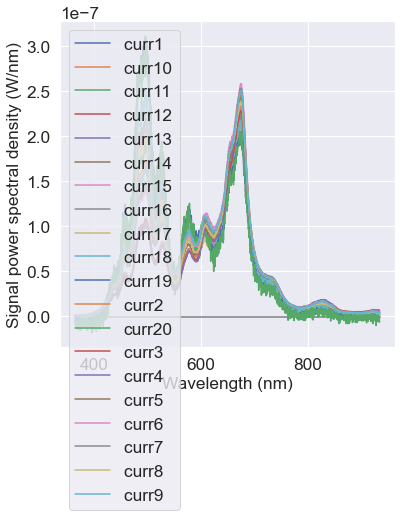

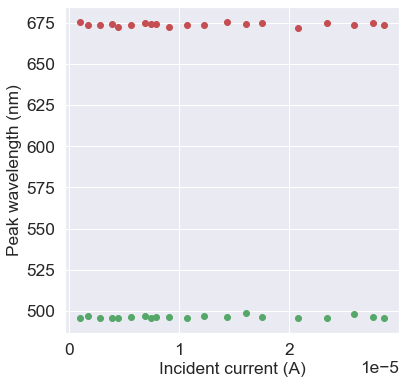

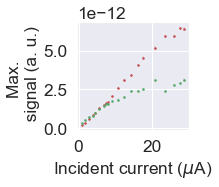

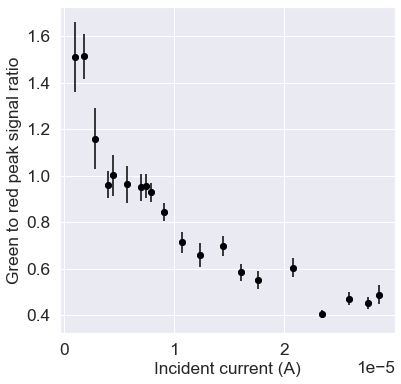

In [3]:
## III -- CURRENT DEPENDENCE [ADAPTED FROM ROUND 3]

path = '/round3-july30/current_dependence/'
spectra = spectrum.find_all_spectra(path, caption_flag = "10int_", caption_length= 6)
spectra = spectrum.find_all_current_files_match(path, spectra, caption_flag="current_dependence")

path_to_background = path + 'background/'

background_spectrum_multi = spectrum.find_all_spectra(path_to_background, caption_flag=path_to_background, caption_length=len(path_to_background))
background_spectrum_multi = background_spectrum_multi[0]
background_spectrum_multi.process_spectra_list()

for spec in spectra:
    spec.process_spectra_list()
    
curr_plot, err_curr_plot, rpeak_plot, rerr_peak_plot, gpeak_plot, gerr_peak_plot = [], [], [], [], [], []
rpeak_wl, gpeak_wl = [], [] 
fig = plt.figure()
for spec in spectra:
    # Change the line below to plot selected files
    if re.search("thick4", spec.name):
#     if re.search("unpat", spec.name):        
        if spec.dict["nframes"] == 10:
            print("Spectra name: {}".format(spec.name)) 
            print("Spectra associated current: {}".format(spec.dict["curr"]))         
            spec.remove_background(background_spectrum_multi)        
            spec.remove_cosmic()
            spec.power_calibrate(loss_function) # Divides by loss function measured through power calibration 

            # Read data for peak vs. current plot [TWO PEAKS]
            half_wl_ind = 570 
            # RED PEAK
            rpeak_max  = np.max(np.max(spec.lint[half_wl_ind:]))
            rmax_ind = np.where(spec.lint == rpeak_max)[0][0]
            rpeak_plot.append(rpeak_max)            
            rerr_peak_plot.append(spec.err[rmax_ind])
            rpeak_wl.append(spec.wl[rmax_ind])

            # GREEN PEAK
            gpeak_max  = np.max(np.max(spec.lint[:half_wl_ind]))
            gmax_ind = np.where(spec.lint == gpeak_max)[0][0]
            gpeak_plot.append(gpeak_max)            
            gerr_peak_plot.append(spec.err[gmax_ind])
            gpeak_wl.append(spec.wl[gmax_ind])

            curr_plot.append(spec.dict["curr"])
            print("DEBUGGING:", curr_plot)
            err_curr_plot.append(spec.dict["curr_std"])

            spec.save_spectra()
            # fig = spec.plot_spectra(fig) # Current normalization by default
            fig = spec.plot_spectra(fig, normalization = "none")    
plt.legend()
plt.xlabel('Wavelength (nm)')       
# plt.ylabel('Counts (u.a.)')
plt.ylabel('Signal power spectral density (W/nm)')
# plt.savefig('round3-figs-updated/current_dependence.svg')

fig = plt.figure()
plt.plot(curr_plot, rpeak_wl, 'o', color = 'r')
plt.plot(curr_plot, gpeak_wl, 'o', color = 'g')
plt.xlabel('Incident current (A)')       
plt.ylabel('Peak wavelength (nm)')
# plt.savefig('round3-figs-updated/peak_wls.svg')

fig = plt.figure(figsize = (2,2))
plt.errorbar([c*1e6 for c in curr_plot], rpeak_plot, xerr=err_curr_plot, yerr=rerr_peak_plot, fmt = 'o', color = 'r', ms = 1.5, elinewidth = 0.25)
plt.errorbar([c*1e6 for c in curr_plot], gpeak_plot, xerr=err_curr_plot, yerr=gerr_peak_plot, fmt = 'o', color = 'g', ms = 1.5, elinewidth = 0.25)
plt.xlabel('Incident current ($\mu$A)')       
# plt.ylabel('Max. signal PSD (W/nm)')
plt.ylabel('Max. \n signal (a. u.)')
# plt.savefig('round3-figs-updated/current_dependence_compiled.svg')

fig = plt.figure()
ratio_plot = np.divide(np.array(gpeak_plot),np.array(rpeak_plot))
ratio_error = [(dg + dr)/r for (dg,dr,r) in zip(gerr_peak_plot, rerr_peak_plot, rpeak_plot)]
plt.plot(curr_plot, ratio_plot, 'o')
# plt.errorbar(curr_plot, ratio_error, xerr=err_curr_plot, yerr=ratio_error, fmt = 'o', color = 'black')
plt.errorbar(curr_plot, [g/r for (g,r) in zip(gpeak_plot, rpeak_plot)], yerr=ratio_error, fmt = 'o', color = 'black')
plt.xlabel('Incident current (A)')       
plt.ylabel('Green to red peak signal ratio')
# plt.savefig('round3-figs-updated/grpeaks_ratio.svg')
data = {'ratio_plot': ratio_plot, 'ratio_error':ratio_error,'curr_plot':curr_plot}
# np.save('ratio_current_data', data)

10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/voltage_dependence/thick4_Olympus_10int_refocus_10keV 2020 July 30 17_38_26
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/voltage_dependence/thick4_Olympus_10int_refocus_10keV 2020 July 30 17_38_26, 10 integrated files
10int_ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/voltage_dependence/thick4_Olympus_10int_refocus_15keV 2020 July 30 17_36_37
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round3-july30/voltage_dependence/thick4_Olympus_10int_refocus_15keV 2020 July 30 17_36_37, 10 integ

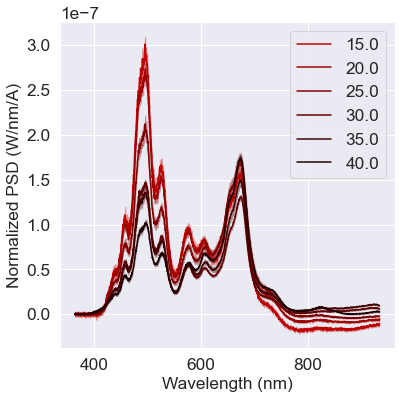

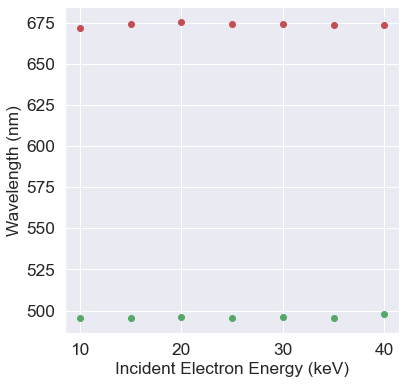

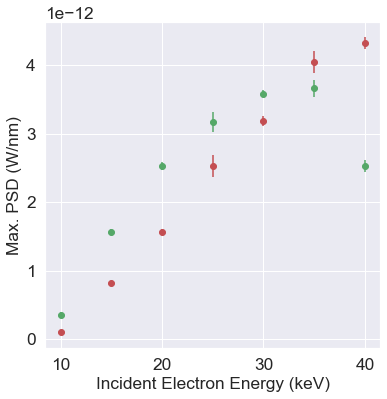

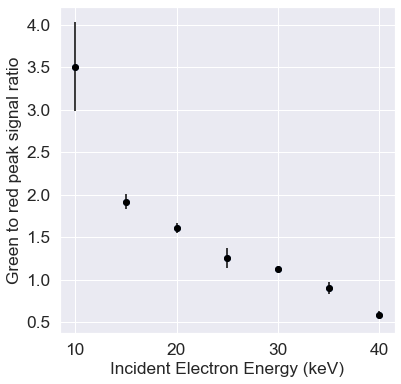

In [15]:
# IV - ENERGY-DEPENDENT MEASUREMENT [FROM ROUND 3]
# Read energy from file name
# plot focus, defocus, thick4, unpat.
path = '/round3-july30/voltage_dependence/'
spectra = spectrum.find_all_spectra(path, caption_flag = "10int_", caption_length= 6)
spectra = spectrum.find_all_current_files_match(path, spectra, caption_flag="voltage_dependence")

path_to_background = path + 'background/'

background_spectrum_multi = spectrum.find_all_spectra(path_to_background, caption_flag=path_to_background, caption_length=len(path_to_background))
background_spectrum_multi = background_spectrum_multi[0]
background_spectrum_multi.process_spectra_list()

for spec in spectra:
    spec.process_spectra_list()
    
volt_plot, peak_plot, rpeak_plot, rerr_peak_plot, gpeak_plot, gerr_peak_plot = [], [], [], [], [], []
rpeak_wl, gpeak_wl = [], [] 
curr_plot = []
fig = plt.figure()
count = -2 
for spec in spectra:
    # Change the line below to plot selected files
    if re.search("thick4", spec.name):
#     if re.search("unpat", spec.name):
        if spec.dict["nframes"] == 10:
            count += 1
            print("Spectra name: {}".format(spec.name)) 
            print("Spectra associated current: {}".format(spec.dict["curr"]))         
            spec.remove_background(background_spectrum_multi)        
            spec.remove_cosmic()
            spec.power_calibrate(loss_function)

            # Read data for peak vs. volt plot [TWO PEAK VERSION]
            half_wl_ind = 570 
            # RED PEAK
            rpeak_max  = np.max(np.max(spec.lint[half_wl_ind :]))
            rmax_ind = np.where(spec.lint == rpeak_max)[0][0]
            rpeak_wl.append(spec.wl[rmax_ind])
            # GREEN PEAK            
            gpeak_max  = np.max(np.max(spec.lint[:half_wl_ind]))
            gmax_ind = np.where(spec.lint == gpeak_max)[0][0]            
            gpeak_wl.append(spec.wl[gmax_ind])
            
            # Not normalized
            rpeak_plot.append(rpeak_max)
            rerr_peak_plot.append(spec.err[rmax_ind])
            gpeak_plot.append(gpeak_max)
            gerr_peak_plot.append(spec.err[gmax_ind])

            # Normalized by current
            curr_plot.append(spec.dict["curr"])
            # rpeak_plot.append(rpeak_max/spec.dict["curr"])
            # rerr_peak_plot.append(spec.err[rmax_ind]/spec.dict["curr"] + rpeak_max*spec.dict["curr_std"])
            # gpeak_plot.append(gpeak_max/spec.dict["curr"])
            # gerr_peak_plot.append(spec.err[gmax_ind]/spec.dict["curr"] + gpeak_max*spec.dict["curr_std"])            

            if re.findall("(\d+)keV", spec.name):
                cap = float(re.findall("(\d+)keV", spec.name)[0]) 
                spec.dict["caption"] = float(re.findall("(\d+)keV", spec.name)[0]) 
                volt_plot.append(cap)
            else:
                cap = "background"                      
            spec.save_spectra()
            ## Choose normalization 
            # fig = spec.plot_spectra(fig, normalization = "none")  
            if float(cap)>10:
                fig = spec.plot_spectra(fig, color = [1.-(float(cap)-5)/40.,0.,0.])  

plt.legend()
plt.xlabel('Wavelength (nm)')       
plt.ylabel('Normalized PSD (W/nm/A)')
# plt.savefig('round3-figs-updated/energy_dependence.svg')

## Plots peak wavelength (sanity check)
fig = plt.figure()
plt.plot(volt_plot, rpeak_wl, 'o', color = 'r')
plt.plot(volt_plot, gpeak_wl, 'o', color = 'g')
plt.xlabel('Incident Electron Energy (keV)')       
plt.ylabel('Wavelength (nm)')
# plt.savefig('round3-figs-updated/peak_wls.svg')

## Plots energy dependence 
fig = plt.figure()
plt.errorbar(volt_plot, rpeak_plot, yerr=rerr_peak_plot, fmt = 'o', color = 'r')
plt.errorbar(volt_plot, gpeak_plot, yerr=gerr_peak_plot, fmt = 'o', color = 'g')
plt.xlabel('Incident Electron Energy (keV)')       
plt.ylabel('Max. PSD (W/nm)')
# plt.ylabel('Max. efficiency (W/nm/A)')
# plt.savefig('round3-figs-updated/energy_dependence_compiled.svg')

## Plots ratio of peaks 
fig = plt.figure()
ratio_plot = np.divide(np.array(gpeak_plot),np.array(rpeak_plot))
ratio_error = [(dg + dr)/r for (dg,dr,r) in zip(gerr_peak_plot, rerr_peak_plot, rpeak_plot)]
plt.plot(volt_plot, ratio_plot, 'o')
plt.errorbar(volt_plot, [g/r for (g,r) in zip(gpeak_plot, rpeak_plot)], yerr=ratio_error, fmt = 'o', color = 'black')
# Note: Outlier at low voltage is removed from data analysis in Figure 3 (because of very large error bar)
plt.xlabel('Incident Electron Energy (keV)')       
plt.ylabel('Green to red peak signal ratio')
# plt.savefig('round3-figs-updated/grpeaks_ratio.svg')
data = {'ratio_plot': ratio_plot, 'ratio_error':ratio_error,'curr_plot':curr_plot,'volt_plot':volt_plot}
np.save('ratio_voltage_data', data)

/round4-august24/tilt/ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/tilt/thick4_Olympus_10int_Tilt0pt5 2020 August 24 12_06_40
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/tilt/thick4_Olympus_10int_Tilt0pt5 2020 August 24 12_06_40, 10 integrated files
/round4-august24/tilt/ /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/tilt/thick4_Olympus_10int_Tilt1pt0 2020 August 24 12_07_42
Measurement /Users/crc/Dropbox (MIT)/Research projects/SilicaCLShaping -- Paper/Submission/Science_resub/nanoscint/maintext/Figure3/electron-scintillation/round4-august24/tilt/thick4_Olympus_10int_Tilt1pt0 2020 August 24 12_07_42, 10 integrated files
/round4-august24

Text(0, 0.5, 'Wavelength (nm)')

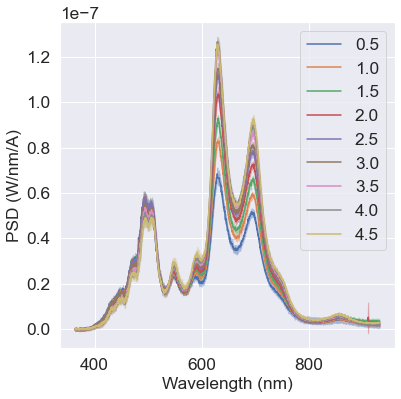

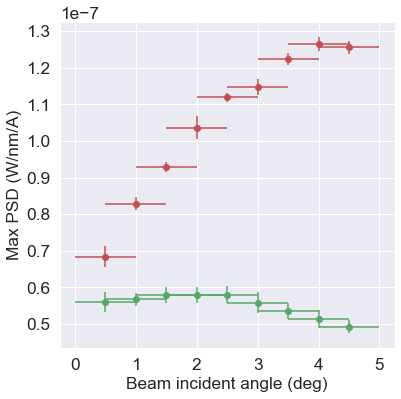

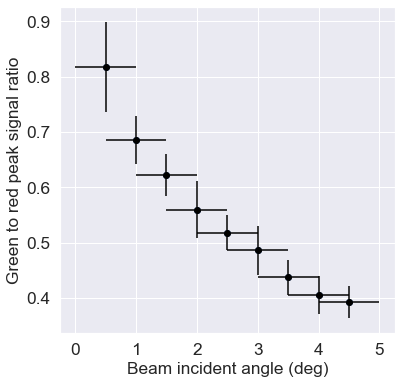

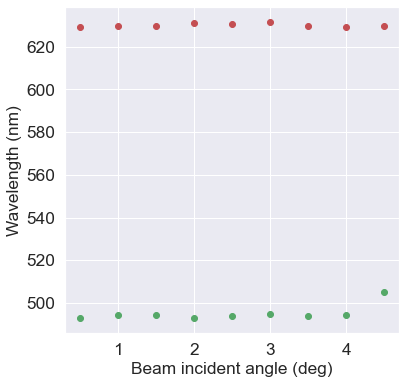

In [9]:
## I -- TILT INFLUENCE [FROM ROUND 4]

path = '/round4-august24/tilt/'
spectra = spectrum.find_all_spectra(path, caption_flag = path, caption_length= len(path))
spectra = spectrum.find_all_current_files_match(path, spectra, caption_flag="tilt")

path_to_background = path + 'background/'

background_spectrum_multi = spectrum.find_all_spectra(path_to_background, caption_flag=path_to_background, caption_length=len(path_to_background))
background_spectrum_multi = background_spectrum_multi[0]
background_spectrum_multi.process_spectra_list()

for spec in spectra:
    spec.process_spectra_list()
    
fig = plt.figure()
rplot_pol, rerr_plot_pol, gplot_pol, gerr_plot_pol, ang_plot_pol = [], [], [], [], []
rpeak_wl, gpeak_wl = [], []
for spec in spectra:
    if re.search("unpat", spec.name):
        if spec.dict["nframes"] == 10:
            print("Spectra name: {}".format(spec.name)) 
            spec.remove_background(background_spectrum_multi)        
            spec.remove_cosmic()
            spec.power_calibrate(loss_function)
            spec.save_spectra()
            if re.findall("Tilt(\d+)", spec.name):                
                regex = re.findall("Tilt(\d+)pt(\d+)", spec.name)
                print(regex)
                cap = float(regex[0][0]) + float(regex[0][1])/10.
                spec.dict["caption"] = cap
            else:
                cap = "background"
            
            half_wl_ind = 500                 
            # RED PEAK
            rpeak_max  = np.max(np.max(spec.lint[half_wl_ind :]))
            rmax_ind = np.where(spec.lint == rpeak_max)[0][0]
            rpeak_wl.append(spec.wl[rmax_ind])    
            rplot_pol.append(spec.lint[rmax_ind]/spec.dict["curr"])
            rerr_plot_pol.append(spec.err[rmax_ind]/spec.dict["curr"])

            # GREEN PEAK
            gpeak_max  = np.max(np.max(spec.lint[ : half_wl_ind]))
            gmax_ind = np.where(spec.lint == gpeak_max)[0][0]
            gpeak_wl.append(spec.wl[gmax_ind])    
            gplot_pol.append(spec.lint[gmax_ind]/spec.dict["curr"] )
            gerr_plot_pol.append(spec.err[gmax_ind]/spec.dict["curr"])            

            ang_plot_pol.append(cap)
            fig = spec.plot_spectra(fig)    
plt.legend()
plt.xlabel('Wavelength (nm)')       
plt.ylabel('PSD (W/nm/A)')
# plt.ylim([-50, 1000])
# plt.savefig('round3-figs-updated/tilt_spectra.svg')

## Plots influence of tilt 
plt.figure()
plt.errorbar(ang_plot_pol, rplot_pol, yerr = rerr_plot_pol, xerr = 0.5, fmt = 'o', color = 'r')
plt.errorbar(ang_plot_pol, gplot_pol, yerr = gerr_plot_pol, xerr = 0.5, fmt = 'o', color = 'g')
plt.xlabel('Beam incident angle (deg)')       
plt.ylabel('Max PSD (W/nm/A)')
# plt.savefig('round3-figs-updated/tilt.svg')

## Plots ratio of peaks 
fig = plt.figure()
plt.plot(ang_plot_pol, np.divide(np.array(gplot_pol),np.array(rplot_pol)), 'o')
plt.errorbar(ang_plot_pol, [g/r for (g,r) in zip(gplot_pol, rplot_pol)], xerr = 0.5, yerr=[(dg + dr)/r for (dg,dr,r) in zip(gerr_plot_pol, rerr_plot_pol, rplot_pol)], fmt = 'o', color = 'black')
plt.xlabel('Beam incident angle (deg)')       
plt.ylabel('Green to red peak signal ratio')
# plt.savefig('round3-figs-updated/tilt_grpeaks_ratio.svg')

## Plots peak wavelength (sanity check)
fig = plt.figure()
plt.plot(ang_plot_pol, rpeak_wl, 'o', color = 'r')
plt.plot(ang_plot_pol, gpeak_wl, 'o', color = 'g')
plt.xlabel('Beam incident angle (deg)')       
plt.ylabel('Wavelength (nm)')
# plt.savefig('round3-figs-updated/tilt_peak_wls.svg')